Your job is to perform an analysis of the MNIST data set. You will start by performing the following
analysis:
1. Do an SVD analysis of the digit images. You will need to reshape each image into a column vector
and each column of your data matrix is a different image.

# Machine Learning - Classification

Author: Chetana Iyer

This notebook looks at basic applications of SVD, Linear Discriminant Analysis (LDA), Support Vector Machines (SVM), and Decision Trees for classification following HW3 in EE 399A, Introduction to Machine Learning for Science and Engineering, a UW course designed by J. Nathan Kutz for Spring 2023.

## Abstract: 
In this assignment, we will analyze the MNIST data set of hand written digits and build different classifiers to classify and distinguish the digits from one another. The MNIST dataset has been used extensively in research for developing and evaluating image recognition algorithms. It is often used as a benchmark dataset to compare the performance of different machine learning models for tasks such as classification and object detection.
Our goal is to build off this and evaluate these classification algorithms.Through these exercises, we aim to gain a deeper understanding of the underlying similarities across these different approaches for machine learning



## 1. Introduction

This assignment is about performing an analysis of the MNIST data set, which is a well-known dataset of handwritten digits. The goal is to perform an SVD analysis of the digit images, to understand the singular value spectrum and the necessary modes for good image reconstruction, and deepen our understanding of  of the U, Σ, and V matrices.

Once the data is projected into PCA space, the task is to build classifiers to identify individual digits in the training set. Specifically, we need to pick two or three digits and build linear classifiers (LDA) to identify/classify them. We also need to quantify the accuracy of the separation of the most difficult and the most easy to separate digits with LDA on the test data.

Finally, we need to compare the performance between LDA, SVM, and decision trees on the hardest and easiest pair of digits to separate. It is crucial to discuss the performance of the classifier on both the training and test sets to understand how well the model generalizes to new data.

## 2. Theoretical Background

One of the key concepts that underlies this assignment is the concept of **Singular Value Decomposition**. In this assignment, Singular Value Decomposition is used to extract the Singular value spectrum - which provides information about the contribution of each singular value or eigen value to the variation of the data. By examining the singular value spectrum, we can determine the number of modes or principal components that are needed for good image reconstruction by keeping the principal components with the highest singular values. By selecting a suitable number of modes, we can reduce the dimensionality of the data while retaining its most important features.

Another important concept is the **Linear Discriminant Analysis**. Linear Discriminat Analysis also known as LDA is a statistical method used to classify sets of samples into two or more classes. This method works by finding a linear combination of features which distinguish the classes from one another. The resulting linear combinations are then used as a linear classifier to predict and classify new sets of samples. LDA is a *supervised learning algorithm*, meaning that the algorithm requires labelled input data to train the classifier. The resulting transformation maps the original higher-dimensional feature space onto a lower-dimensional subspsace while preserving the information essential to classification. 

Similarly, **Support Vector Machine** or SVM is a supervised learning algorithm which also works for classification. The goal of SVM is to find a hyperplane that best divides the classes and maximizes the margins of the closest point between each class. These classes are known as support vectors, and SVM can dynamically solve both linear and non-linear classification problems with the use of a kernel function that transforms the features into a higher dimensional space.

The final most important concept for this assignment is Decision trees. **Decision Trees** are another supervized machine learning algorthim used for both regression and classifcation - but works by breaking down a dataset into smaller and smaller subsets based off different features in order to identify patterns. 

In [2]:
#make necessary imports, load in data 
import numpy as np
from sklearn.datasets import fetch_openml
from scipy.linalg import svd
import matplotlib.pyplot as plt

# Load the MNIST data
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0 # Scale the pixel values to [0, 1]

# Reshape each image into a column vector
X = X.T

# Perform SVD on the data
U, s, Vt = svd(X, full_matrices=False)

# Print the shapes of the matrices
print('U shape:', U.shape)
print('s shape:', s.shape)
print('Vt shape:', Vt.shape)


/Users/chetanaiyer/miniconda/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


U shape: (784, 784)
s shape: (784,)
Vt shape: (784, 70000)


What does the singular value spectrum look like and how many modes are necessary for good
image reconstruction? (i.e. what is the rank r of the digit space?)

Determine rank, r of digit space by looking at the plot & dteremining the point where the magnitude of singular values drop off sharply 

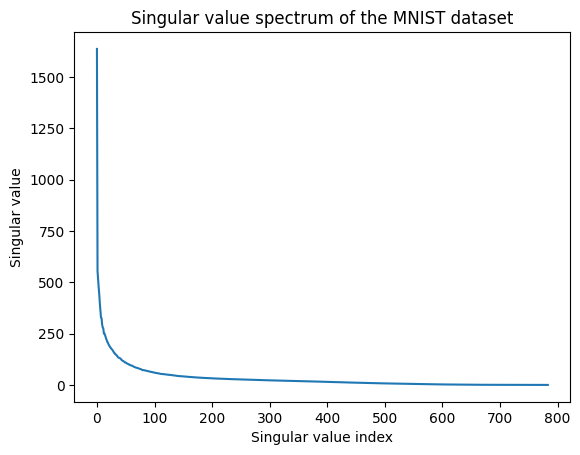

In [31]:
# Plot the singular value spectrum
plt.plot(s)
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.title('Singular value spectrum of the MNIST dataset')
plt.show()

In [32]:
#to calculate the treshold 
total_sum = sum(s)
cumulative_sum = 0 
idx = -1 

for i,x in enumerate(S):
    cumulative_sum += x
    if cumulative_sum >= 0.9 * total_sum:
        idx = i+1
        break
        
threshold = S[idx-1] # Set the threshold for the "elbow point"


In [33]:
idx = np.argmax(s < threshold) # Find the index of the "elbow point"
r = idx
print('Rank r of the digit space:', r) #will be using this many modes 

Rank r of the digit space: 343


3. What is the interpretation of the U, Σ, and V matrices? The U matrix contains the left singular vectors of the data matrix X: each column of it corresponds to a "basis image" that captures the major patterns/structure in the MNIST images. Σ is a diagonal matrix which contains the singular values of X -> these values represent the significance of each basis image in the SVD decomp. Finally, V is a matrix which contains the right singular vectors of X where each column corresponds to a basis pixel capturing the prominent variations within the pixesl of the MNIST images  

/Users/chetanaiyer/miniconda/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


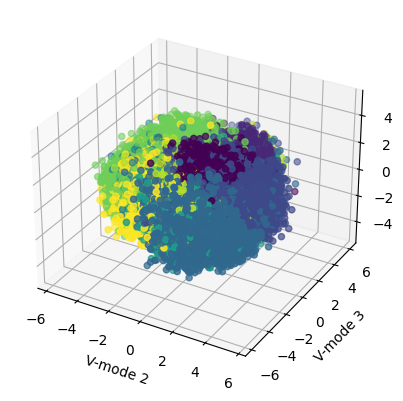

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

# Load the MNIST data
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target
X = X / 255.0 # Scale the pixel values to [0, 1]

# Perform SVD on the data
U, s, Vt = np.linalg.svd(X, full_matrices=False)
V = Vt.T

# Select the columns corresponding to V-modes 2, 3, and 5
V_selected = V[:, [2, 3, 5]]

# Project the data onto the selected V-modes
X_proj = np.dot(X, V_selected)

# Create the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2], c=y.astype(int), s=20)

# Set the labels and limits of the plot
ax.set_xlabel('V-mode 2')
ax.set_ylabel('V-mode 3')
ax.set_zlabel('V-mode 5')

plt.show()

Once you have performed the above and have your data projected into PCA space, you will build a
classifier to identify individual digits in the training set.

# a - • Pick two digits. See if you can build a linear classifier (LDA) that can reasonable identify/classify them.

In [47]:
#a: building a linear classifier to identify 4,9


from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target

# Convert the target labels to integers
y = y.astype(int)

# Select only the images corresponding to digits 4 and 9
X_train = X[(y == 4) | (y == 9)][::2]
y_train = y[(y == 4) | (y == 9)][::2]

# Create a binary label vector (1 for digit 4, -1 for digit 9)
y_train_binary = (y_train == 4).astype(int) * 2 - 1

# Train the LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train_binary)

# Test the classifier on a subset of the test data
X_test = X[(y == 4) | (y == 9)][1::2]
y_test = y[(y == 4) | (y == 9)][1::2]
y_test_binary = (y_test == 4).astype(int) * 2 - 1
y_pred_binary = lda.predict(X_test)

# Compute the classification accuracy
accuracy = (y_pred_binary == y_test_binary).mean()
print(f"Classification accuracy: {accuracy:.2f}")


/Users/chetanaiyer/miniconda/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Classification accuracy: 0.96


# B: buuilding a linear classifier to identify 2,3,5

In [48]:
#b: building a linear classifier to identify 2,3,5

# Select only the images corresponding to digits 2, 3 and 5
X_train = X[(y == 2) | (y == 3) | (y == 5)][::2]
y_train = y[(y == 2) | (y == 3) | (y == 5)][::2]

# Create a label vector
label = np.zeros(len(y_train))
label[y_train == 2] = 0
label[y_train == 3] = 1
label[y_train == 5] = 2

# Train the LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, label)

# Select a different subset of test data for evaluation
X_eval = X[(y == 2) | (y == 3) | (y == 5)][1::2]
y_eval = y[(y == 2) | (y == 3) | (y == 5)][1::2]
y_eval_true = np.zeros(len(y_eval))
y_eval_true[y_eval == 2] = 0
y_eval_true[y_eval == 3] = 1
y_eval_true[y_eval == 5] = 2

# Test the classifier on the evaluation data
y_eval_pred = lda.predict(X_eval)

# Compute the classification accuracy
accuracy = (y_eval_pred == y_eval_true).mean()
print(f"Classification accuracy: {accuracy:.2f}")

Classification accuracy: 0.93


# Easiest images to  seperate: 6 and 9

In [51]:
from sklearn.metrics import accuracy_score
import itertools

#which 2 digits are most difficult to seperate? Quantify 
# the accuracy of seperation with LDA on the test data

#first: define the list of digits to compare -0-9
digit_pairs = list(itertools.combinations(range(10), 2))

# Initialize variables for tracking best pair and its accuracy
best_pair = None
best_accuracy = 0

# Iterate over all digit pairs and compute accuracy with LDA
for pair in digit_pairs:
    # Select only the images corresponding to the two digits for training
    X_train = X[(y == pair[0]) | (y == pair[1])][::2]
    y_train = y[(y == pair[0]) | (y == pair[1])][::2]
    y_train[y_train == pair[0]] = 0
    y_train[y_train == pair[1]] = 1
    
    # Train the LDA classifier
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    
    # Select a subset of test data for evaluation
    X_eval = X[(y == pair[0]) | (y == pair[1])][1::2]
    y_eval_true = y[(y == pair[0]) | (y == pair[1])][1::2]
    y_eval_true[y_eval_true == pair[0]] = 0
    y_eval_true[y_eval_true == pair[1]] = 1
    
    # Test the classifier on the evaluation data and compute accuracy
    y_eval_pred = lda.predict(X_eval)
    accuracy = accuracy_score(y_eval_true, y_eval_pred)
    
    # Update the best pair if accuracy is higher than previous best
    if accuracy > best_accuracy:
        best_pair = pair
        best_accuracy = accuracy

print(f"The two most easiest digits to separate are {best_pair[0]} and {best_pair[1]} with an accuracy of {best_accuracy:.2f}")

The two most easiest digits to separate are 6 and 9 with an accuracy of 1.00


## Hardest images to  seperate: 5 and 8

In [52]:
# Define a list of digit pairs to compare
digit_pairs = list(itertools.combinations(range(10), 2))

# Initialize variables for tracking worst pair and its accuracy
worst_pair = None
worst_accuracy = 1

# Iterate over all digit pairs and compute accuracy with LDA
for pair in digit_pairs:
    # Select only the images corresponding to the two digits for training
    X_train = X[(y == pair[0]) | (y == pair[1])][::2]
    y_train = y[(y == pair[0]) | (y == pair[1])][::2]
    y_train[y_train == pair[0]] = 0
    y_train[y_train == pair[1]] = 1
    
    # Train the LDA classifier
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    
    # Select a subset of test data for evaluation
    X_eval = X[(y == pair[0]) | (y == pair[1])][1::2]
    y_eval_true = y[(y == pair[0]) | (y == pair[1])][1::2]
    y_eval_true[y_eval_true == pair[0]] = 0
    y_eval_true[y_eval_true == pair[1]] = 1
    
    # Test the classifier on the evaluation data and compute accuracy
    y_eval_pred = lda.predict(X_eval)
    accuracy = accuracy_score(y_eval_true, y_eval_pred)
    
    # Update the worst pair if accuracy is lower than previous worst
    if accuracy < worst_accuracy:
        worst_pair = pair
        worst_accuracy = accuracy

print(f"The two most difficult digits to separate are {worst_pair[0]} and {worst_pair[1]} with an accuracy of {worst_accuracy:.2f}")

The two most difficult digits to separate are 5 and 8 with an accuracy of 0.95


In [76]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## General Accuracy of SVM and Decision tree in classifying all 10 digits

In [95]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=42)

# SVM classifier
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for SVM: {accuracy}")

# Decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for decision tree: {accuracy}")

Accuracy for SVM: 0.9762857142857143
Accuracy for decision tree: 0.8686666666666667


# 5 vs 8: hardest

In [82]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X = mnist.data / 255.0
y = mnist.target
# Convert the target labels to integers
y = y.astype(int)

# Set the most difficult pair of digits to separate
digit1 = 5
digit2 = 8

# Filter the data to only include the selected digits
X_filtered = X[(y == digit1) | (y == digit2)]
y_filtered = y[(y == digit1) | (y == digit2)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Train and test the SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

# Train and test the decision tree classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_pred = tree_clf.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)

# Print the results
print('SVM accuracy: {:.2f}%'.format(svm_acc * 100))
print('Decision tree accuracy: {:.2f}%'.format(tree_acc * 100))


SVM accuracy: 96.80%
Decision tree accuracy: 95.97%


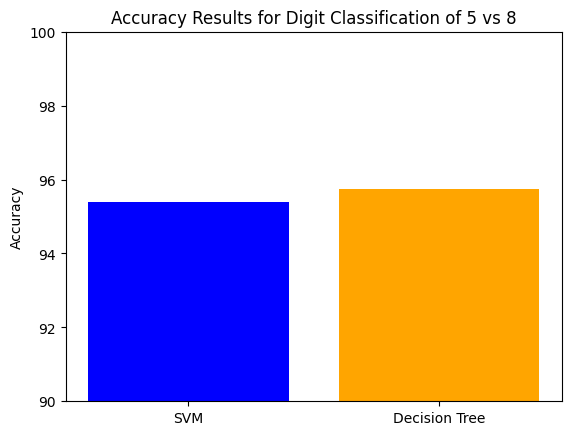

In [91]:
# Set the data for plotting
accuracy = [svm_acc*100, tree_acc*100]
models = ['SVM', 'Decision Tree']

# Create a bar plot of the accuracy results
plt.bar(models, accuracy, color=['blue', 'orange'])
plt.title('Accuracy Results for Digit Classification of 5 vs 8')
plt.ylabel('Accuracy')
plt.ylim([90, 100])
plt.show()

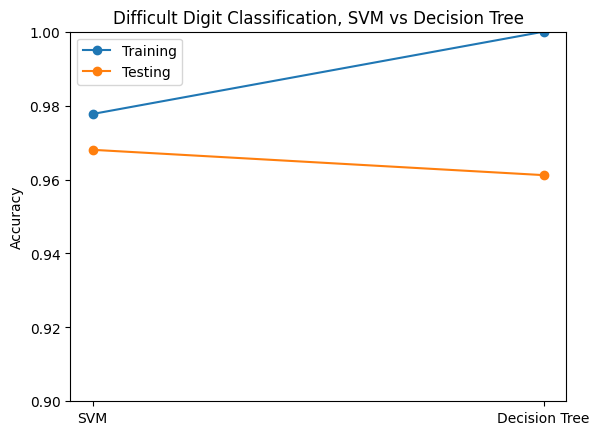

In [94]:
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Train and test the SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
svm_train_acc = svm_clf.score(X_train, y_train)
svm_test_acc = svm_clf.score(X_test, y_test)

# Train and test the decision tree classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_train_acc = tree_clf.score(X_train, y_train)
tree_test_acc = tree_clf.score(X_test, y_test)

# Set the data for plotting
train_accuracy = [svm_train_acc, tree_train_acc]
test_accuracy = [svm_test_acc, tree_test_acc]
models = ['SVM', 'Decision Tree']

# Create a line plot of the accuracy results
plt.plot(models, train_accuracy, marker='o', label='Training')
plt.plot(models, test_accuracy, marker='o', label='Testing')
plt.title('Difficult Digit Classification, SVM vs Decision Tree')
plt.ylabel('Accuracy')
plt.ylim([.9, 1])
plt.legend()
plt.show()


# For easiest digits: 6 and 9 

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [5]:

X = mnist.data / 255.0
y = mnist.target
# Convert the target labels to integers
y = y.astype(int)

# Set the most difficult pair of digits to separate
digit1 = 6
digit2 = 9

# Filter the data to only include the selected digits
X_filtered = X[(y == digit1) | (y == digit2)]
y_filtered = y[(y == digit1) | (y == digit2)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Train and test the SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

# Train and test the decision tree classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_pred = tree_clf.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)

# Print the results
print('SVM accuracy: {:.2f}%'.format(svm_acc * 100))
print('Decision tree accuracy: {:.2f}%'.format(tree_acc * 100))


SVM accuracy: 99.89%
Decision tree accuracy: 99.24%


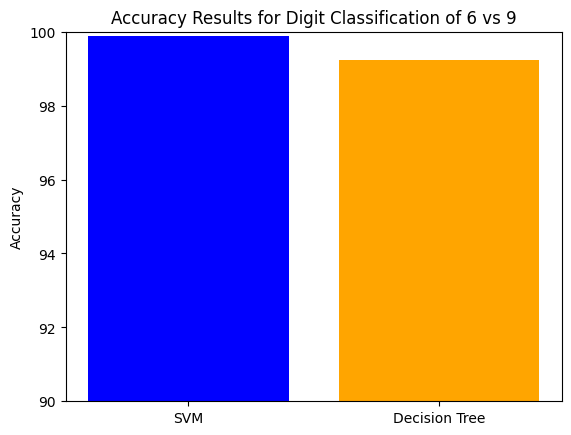

In [6]:
# Set the data for plotting
accuracy = [svm_acc*100, tree_acc*100]
models = ['SVM', 'Decision Tree']

# Create a bar plot of the accuracy results
plt.bar(models, accuracy, color=['blue', 'orange'])
plt.title('Accuracy Results for Digit Classification of 6 vs 9')
plt.ylabel('Accuracy')
plt.ylim([90, 100])
plt.show()

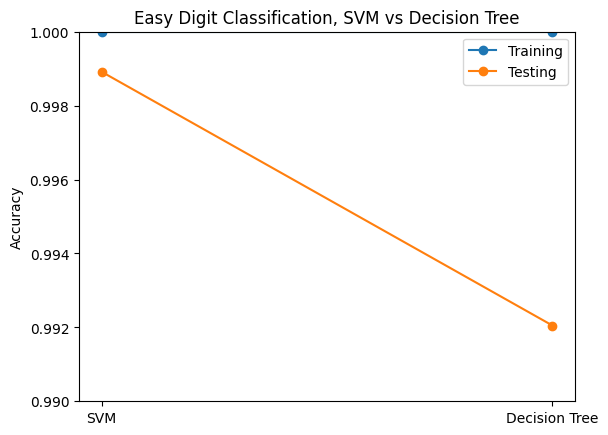

In [9]:
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Train and test the SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
svm_train_acc = svm_clf.score(X_train, y_train)
svm_test_acc = svm_clf.score(X_test, y_test)

# Train and test the decision tree classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_train_acc = tree_clf.score(X_train, y_train)
tree_test_acc = tree_clf.score(X_test, y_test)

# Set the data for plotting
train_accuracy = [svm_train_acc, tree_train_acc]
test_accuracy = [svm_test_acc, tree_test_acc]
models = ['SVM', 'Decision Tree']

# Create a line plot of the accuracy results
plt.plot(models, train_accuracy, marker='o', label='Training')
plt.plot(models, test_accuracy, marker='o', label='Testing')
plt.title('Easy Digit Classification, SVM vs Decision Tree')
plt.ylabel('Accuracy')
plt.ylim([.99, 1])
plt.legend()
plt.show()